# Econ Problem Set 1

## Ari Boyarsky

In [3]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt

# to print plots inline
%matplotlib inline

# Question 1

### Problem 1
State Variables: $z_t, k_t$

### Problem 2
State Variables: $c_t, k_{t+1}$

### Problem 3
Bellman: $V(z_t, k_t) = \max u(c_t) + \beta \mathbb{E}V(z_{t+1}, k_{t+1})$ s.t. $zk^\alpha - c - k' + (1-\delta)k = 0$

### Problem 4
### Solution

$\mathcal{L} =\sum_t \beta^t u(c_t) - \sum_t \lambda_t\beta^t[z_tk_t^\alpha - c_t - k_{t+1} + (1-\delta)k_t]$

Then, 

$\mathcal{L} =\sum_t \beta^t u(c) - \sum_t \lambda_t\beta^t[zk^\alpha - c - k' + (1-\delta)k]$

FOC:

$\beta^tc^{-\gamma} = - \lambda_t$
$\beta^tc^{-\gamma} = 

In [33]:
gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
sigma = 0.2

In [40]:
# Set up Grid

'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital grid
ub_k      = scalar, upper bound of capital grid 
lb_z      = scalar, lower bound of z grid
ub_z      = scalar, upper bound of z grid  
------------------------------------------------------------------------
'''

lb_k = 10 # k around steady state
ub_k = 13
size_z = 60  # Number of grid points
size_k = 60  # Number of grid points
k_grid = np.linspace(lb_k, ub_k, size_k)

'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
'''
import ar1_approx as ar1
z_t, pi_t = ar1.addacooper(size_z, 0, 0, sigma)
z_grid = np.exp(z_t)
pi = np.transpose(pi_t)


C = np.zeros((size_k, size_k, size_z)) 
for i in range(size_k): # loop over k
    for j in range(size_k): # loop over k+1
        for n in range(size_z): # loop over z
            curr_k = k_grid[i]
            nxt_k = k_grid[j]
            C[i,j,n] = z_grid[n]*(curr_k**alpha) - nxt_k + (1 - delta)*curr_k
            
C[C<=0] = 1e-15
if sigma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -9999999



In [42]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
'''
VFtol = 1e-7
VFdist = 7.0 
VFmaxiter = 1000
V = np.zeros((size_k, size_z)) # initial guess at value function
Vmat = np.zeros((size_k, size_k, size_z)) # initialize Vmat matrix
Vstore = np.zeros((size_k, size_z, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_k): # loop over k
        for j in range(size_k): # loop over k+1
            for n in range(size_z): # loop over z
                EV = 0
                for qq in range(size_z): # get expecatation
                    EV += pi_t[n, qq] * V[j, qq] 
                Vmat[i,j,n] = U[i,j,n] + beta*EV
      
    Vstore[:,:, VFiter] = V.reshape(size_k, size_z,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator over k_t+1
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    # print("VFdist = {} at iteration {}".format(VFdist, VFiter))
    V = TV
    VFiter += 1
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

Value function converged after this many iterations: 423


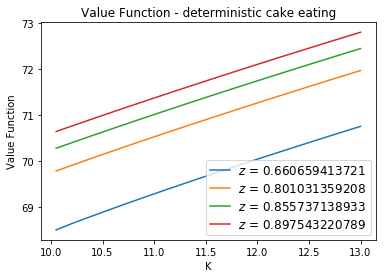

In [44]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(z_grid[0]))
ax.plot(k_grid[1:], VF[1:, 5], label='$z$ = ' + str(z_grid[5]))
ax.plot(k_grid[1:], VF[1:, 10], label='$z$ = ' + str(z_grid[10]))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(z_grid[15]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('K')
plt.ylabel('Value Function')
plt.title('Value Function - deterministic cake eating')
plt.show()

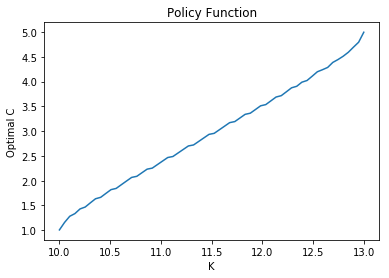

In [46]:
optK = k_grid[PF]
optC = z_grid*(k_grid**alpha) - optK + (1 - delta)*k_grid
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][10])
# Now add the legend with some customizations.
plt.xlabel('K')
plt.ylabel('Optimal C')
plt.title('Policy Function')
plt.show()

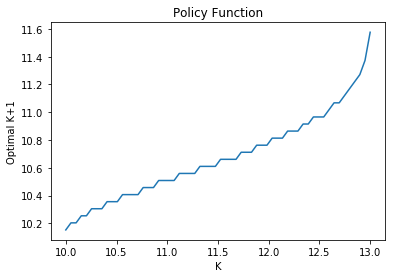

In [48]:
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][10])
# Now add the legend with some customizations.
plt.xlabel('K')
plt.ylabel('Optimal K+1')
plt.title('Policy Function')
plt.show()

# Question 3

### Problem 3
Bellman: $V(z_t, k_t) = \max u(c_t) + \beta \mathbb{E}[V(z_{t+1}, k_{t+1})|z_t]$ s.t. $zk^\alpha - c - k' + (1-\delta)k = 0$

In [50]:
gamma = 0.5
beta = 0.96
delta = 0.05
alpha = 0.4
rho = 0.8
sigma_v = 0.1

In [51]:
# Set up Grid

'''
------------------------------------------------------------------------
Create Grid for State Space    
------------------------------------------------------------------------
lb_k      = scalar, lower bound of capital grid
ub_k      = scalar, upper bound of capital grid 
lb_z      = scalar, lower bound of z grid
ub_z      = scalar, upper bound of z grid  
------------------------------------------------------------------------
'''

lb_k = 10 # k around steady state
ub_k = 13
size_z = 60  # Number of grid points
size_k = 60  # Number of grid points
k_grid = np.linspace(lb_k, ub_k, size_k)

'''
------------------------------------------------------------------------
Create grid of current utility values    
------------------------------------------------------------------------
'''
import ar1_approx as ar1
z_t, pi_t = ar1.addacooper(size_z, 0, rho, sigma_v)
z_grid = np.exp(z_t)
pi = np.transpose(pi_t)


C = np.zeros((size_k, size_k, size_z)) 
for i in range(size_k): # loop over k
    for j in range(size_k): # loop over k+1
        for n in range(size_z): # loop over z
            curr_k = k_grid[i]
            nxt_k = k_grid[j]
            C[i,j,n] = z_grid[n]*(curr_k**alpha) - nxt_k + (1 - delta)*curr_k
            
C[C<=0] = 1e-15
if sigma == 1:
    U = np.log(C)
else:
    U = (C ** (1 - gamma)) / (1 - gamma)
U[C<0] = -9999999



In [52]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
'''
VFtol = 1e-8
VFdist = 7.0 
VFmaxiter = 1000
V = np.zeros((size_k, size_z)) # initial guess at value function
Vmat = np.zeros((size_k, size_k, size_z)) # initialize Vmat matrix
Vstore = np.zeros((size_k, size_z, VFmaxiter)) #initialize Vstore array
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_k): # loop over k
        for j in range(size_k): # loop over k+1
            for n in range(size_z): # loop over z
                EV = 0
                for qq in range(size_z): # get expecatation
                    EV += pi_t[n, qq] * V[j, qq] 
                Vmat[i,j,n] = U[i,j,n] + beta*EV
      
    Vstore[:,:, VFiter] = V.reshape(size_k, size_z,) # store value function at each iteration for graphing later
    TV = Vmat.max(1) # apply max operator over k_t+1
    PF = np.argmax(Vmat, axis=1)
    VFdist = (np.absolute(V - TV)).max()  # check distance
    print("VFdist = {} at iteration {}".format(VFdist, VFiter))
    V = TV
    VFiter += 1
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

VFdist = 5.127491482346631 at iteration 1
VFdist = 3.5030844368971614 at iteration 2
VFdist = 3.1815059604401785 at iteration 3
VFdist = 2.9471218282676173 at iteration 4
VFdist = 2.7508040660888256 at iteration 5
VFdist = 2.5802933192104796 at iteration 6
VFdist = 2.431172649850101 at iteration 7
VFdist = 2.298704962272769 at iteration 8
VFdist = 2.1796472428276346 at iteration 9
VFdist = 2.071557413144948 at iteration 10
VFdist = 1.9725578058553097 at iteration 11
VFdist = 1.881186773190965 at iteration 12
VFdist = 1.7962971538942227 at iteration 13
VFdist = 1.7169825801134806 at iteration 14
VFdist = 1.6425220065304487 at iteration 15
VFdist = 1.5723378824936276 at iteration 16
VFdist = 1.5059638919536127 at iteration 17
VFdist = 1.4430206531657603 at iteration 18
VFdist = 1.38319589570645 at iteration 19
VFdist = 1.326229917940509 at iteration 20
VFdist = 1.2719042179333755 at iteration 21
VFdist = 1.2200326453573354 at iteration 22
VFdist = 1.170454649454662 at iteration 23
VFdist

VFdist = 0.0017709906175582546 at iteration 182
VFdist = 0.001700150992846261 at iteration 183
VFdist = 0.0016321449531488952 at iteration 184
VFdist = 0.0015668591550337396 at iteration 185
VFdist = 0.001504184788828411 at iteration 186
VFdist = 0.0014440173972616321 at iteration 187
VFdist = 0.001386256701366051 at iteration 188
VFdist = 0.0013308064332875347 at iteration 189
VFdist = 0.001277574175958307 at iteration 190
VFdist = 0.001226471208951807 at iteration 191
VFdist = 0.0011774123605761133 at iteration 192
VFdist = 0.0011303158661490897 at iteration 193
VFdist = 0.0010851032315031262 at iteration 194
VFdist = 0.0010416991022594857 at iteration 195
VFdist = 0.0010000311381475058 at iteration 196
VFdist = 0.0009600298926244477 at iteration 197
VFdist = 0.0009216286969149223 at iteration 198
VFdist = 0.0008847635490383254 at iteration 199
VFdist = 0.0008493730070853189 at iteration 200
VFdist = 0.0008153980868002009 at iteration 201
VFdist = 0.0007827821633412668 at iteration 2

VFdist = 1.7152439966139355e-06 at iteration 352
VFdist = 1.6466342316334703e-06 at iteration 353
VFdist = 1.580768866915605e-06 at iteration 354
VFdist = 1.5175381378185193e-06 at iteration 355
VFdist = 1.4568365855893717e-06 at iteration 356
VFdist = 1.3985631284185729e-06 at iteration 357
VFdist = 1.3426206351141445e-06 at iteration 358
VFdist = 1.2889157829931719e-06 at iteration 359
VFdist = 1.2373591715686416e-06 at iteration 360
VFdist = 1.187864810958672e-06 at iteration 361
VFdist = 1.1403502355733508e-06 at iteration 362
VFdist = 1.094736205686786e-06 at iteration 363
VFdist = 1.0509467784913795e-06 at iteration 364
VFdist = 1.0089089101938953e-06 at iteration 365
VFdist = 9.68552555491442e-07 at iteration 366
VFdist = 9.298104686195074e-07 at iteration 367
VFdist = 8.926180328217015e-07 at iteration 368
VFdist = 8.569133456148847e-07 at iteration 369
VFdist = 8.226367924635269e-07 at iteration 370
VFdist = 7.897313309968013e-07 at iteration 371
VFdist = 7.581420646829429e-07

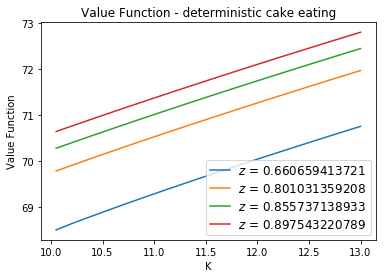

In [53]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[1:], VF[1:, 0], label='$z$ = ' + str(z_grid[0]))
ax.plot(k_grid[1:], VF[1:, 5], label='$z$ = ' + str(z_grid[5]))
ax.plot(k_grid[1:], VF[1:, 10], label='$z$ = ' + str(z_grid[10]))
ax.plot(k_grid[1:], VF[1:, 15], label='$z$ = ' + str(z_grid[15]))
# Now add the legend with some customizations.
legend = ax.legend(loc='lower right', shadow=False)
# Set the fontsize
for label in legend.get_texts():
    label.set_fontsize('large')
for label in legend.get_lines():
    label.set_linewidth(1.5)  # the legend line width
plt.xlabel('K')
plt.ylabel('Value Function')
plt.title('Value Function - deterministic cake eating')
plt.show()

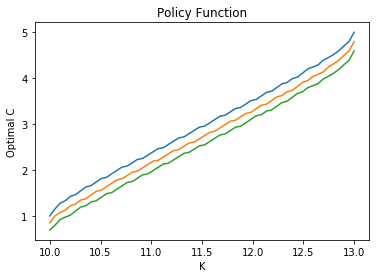

In [54]:
optK = k_grid[PF]
optC = z_grid*(k_grid**alpha) - optK + (1 - delta)*k_grid
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optC[:][10])
ax.plot(k_grid[:], optC[:][15])
ax.plot(k_grid[:], optC[:][19])
# Now add the legend with some customizations.
plt.xlabel('K')
plt.ylabel('Optimal C')
plt.title('Policy Function')
plt.show()

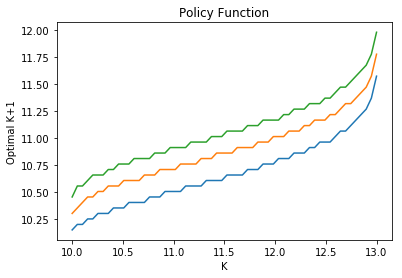

In [55]:
optK = k_grid[PF]
plt.figure()
fig, ax = plt.subplots()
ax.plot(k_grid[:], optK[:][10])
ax.plot(k_grid[:], optK[:][15])
ax.plot(k_grid[:], optK[:][19])
# Now add the legend with some customizations.
plt.xlabel('K')
plt.ylabel('Optimal K+1')
plt.title('Policy Function')
plt.show()

# Question 4

### Problem 1:

Bellman:
    $$V(w) = \max \{V^1(w), V^2(w)\}$$
    $$V^1(w) = \mathbb{E}\sum^\infty_{t=0}\beta^tw = \frac{w}{1-\beta}$$
    $$V^0(w) = b + \beta \mathbb{E} V(w')$$
    
### Problem 2:

In [1]:
beta = 0.96
b = 0.05
mu = 0.0
sigma = 0.15

In [23]:
# Create Grid Space for b
size_w = 100

import ar1_approx as ar1
ln_w_grid, pi_t = ar1.addacooper(size_w, mu, 0, sigma)
w_grid = np.exp(ln_w_grid)
pi = np.transpose(pi_t)

# get grid space for U
U = np.zeros(size_w)
for i in range(size_w):
    U[i] = w_grid[i]/(1-beta)

In [24]:
'''
------------------------------------------------------------------------
Value Function Iteration    
------------------------------------------------------------------------
'''
VFtol = 1e-8
VFdist = 7.0 
VFmaxiter = 100
V = np.zeros(size_w) # initial guess at value function
TV = np.zeros(size_w) # initialize Vmat matrix
Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
PF_discrete = np.zeros(size_w)
VFiter = 1 
while VFdist > VFtol and VFiter < VFmaxiter:  
    for i in range(size_w): # loop over k
                EV = 0
                for qq in range(size_w): # get expecatation
                    EV += pi[i, qq] * V[qq] 
                V_1 = U[i]
                V_0 = b + beta*EV
                TV[i] = max(V_1, V_0)
                PF_discrete[i] = V_1 >= V_0
                
      
    Vstore[:, VFiter] = TV # store value function at each iteration for graphing later
    VFdist = (np.absolute(V - TV)).max()  # check distance
    # print("VFdist = {} at iteration {}".format(VFdist, VFiter))
    V = TV
    VFiter += 1
    


if VFiter < VFmaxiter:
    print('Value function converged after this many iterations:', VFiter)
else:
    print('Value function did not converge')            


VF = V # solution to the functional equation

Value function converged after this many iterations: 3


In [25]:
threshold_w = w_grid[np.argmax(PF_discrete)]
print(threshold_w)

1.03273034785


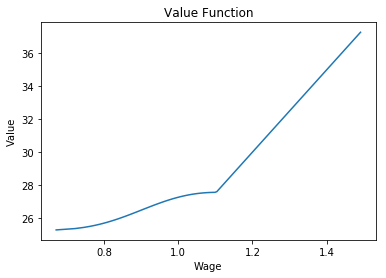

In [35]:
# Plot value function 
plt.figure()
fig, ax = plt.subplots()
ax.plot(w_grid[:], VF[:])
# Set the fontsize
plt.xlabel('Wage')
plt.ylabel('Value')
plt.title('Value Function')
plt.show()

In [27]:
# grid for b
grid_b = np.linspace(0.01, 1, 20)
thresh = np.zeros(20)

In [32]:
# VFI
for j in range(20):
    VFtol = 1e-8
    VFdist = 7.0 
    VFmaxiter = 100
    V = np.zeros(size_w) # initial guess at value function
    TV = np.zeros(size_w) # initialize Vmat matrix
    Vstore = np.zeros((size_w, VFmaxiter)) #initialize Vstore array
    PF_discrete = np.zeros(size_w)
    VFiter = 1 
    while VFdist > VFtol and VFiter < VFmaxiter:  
        for i in range(size_w): # loop over k
                    EV = 0
                    for qq in range(size_w): # get expecatation
                        EV += pi[i, qq] * V[qq] 
                    V_1 = U[i]
                    V_0 = grid_b[j] + beta*EV
                    TV[i] = max(V_1, V_0)
                    PF_discrete[i] = V_1 >= V_0


        Vstore[:, VFiter] = TV # store value function at each iteration for graphing later
        VFdist = (np.absolute(V - TV)).max()  # check distance
        # print("VFdist = {} at iteration {}".format(VFdist, VFiter))
        V = TV
        VFiter += 1



    if VFiter < VFmaxiter:
        print('Value function converged after this many iterations:', VFiter)
    else:
        print('Value function did not converge')            


    VF = V # solution to the functional equation
    thresh[j] = w_grid[np.argmax(PF_discrete)]

Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value function converged after this many iterations: 3
Value func

In [33]:
thresh

array([ 1.02877475,  1.03273035,  1.03672313,  1.04075636,  1.04483344,
        1.048958  ,  1.05313387,  1.05736513,  1.06165615,  1.06165615,
        1.0660116 ,  1.07043651,  1.07493631,  1.07951689,  1.08418465,
        1.0889466 ,  1.09381039,  1.09878449,  1.09878449,  1.10387824])

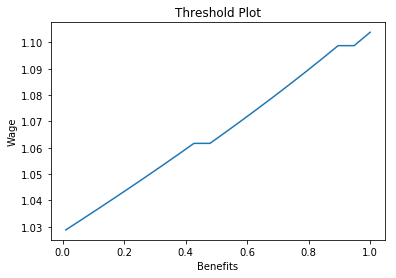

In [34]:
plt.figure()
fig, ax = plt.subplots()
ax.plot(grid_b[:], thresh[:])
# Set the fontsize
plt.xlabel('Benefits')
plt.ylabel('Wage')
plt.title('Threshold Plot')
plt.show()